# Bike Sharing Assignment Case Study - Linear Regression

#### Importing the Library

In [195]:
# importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the library for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [196]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [197]:
# Importing the DataSet
data = pd.read_csv("day.csv")

## Step 1 :  Data Understanding

In [198]:
# Reading the head of the dataset and analysizing the attribute
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [200]:
# checking the dataset having null values or not
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From the above analysis we can conclude that there is no null values in the dataset.

In [201]:
# analyzing the statistical values of numerical variable
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [202]:
data['instant'].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [203]:
# Instant column look like an Index type column which is not useful in model building so simply we can drop it.
data.drop(['instant'], axis=1 , inplace=True)

In [204]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [205]:
# dteday column provide similar information like yr, mnth, weekday etc so simply we can drop it
data.drop(['dteday'], axis=1 , inplace=True)

In [206]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- cnt is the target variable and addition of casual and registered is equal to cnt variable. So keeping casual and registerated variable makes model complicated so straightly we can drop it

In [207]:
# dropping the casual and registered columns
data.drop(['casual','registered'], axis=1 , inplace=True)

In [208]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### By analyzing the data, we can say season,mnth,holiday,weekday,weathersit  are categorical variables, so better replace with more meaningful name

In [209]:
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['mnth'] = data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data['weekday'] = data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data['weathersit'] = data['weathersit'].map({1:"Clear_Few Clouds_Partly Clouds",2:"Mist_cloudy",3:"Light snow_Light rain_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [210]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear_Few Clouds_Partly Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear_Few Clouds_Partly Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear_Few Clouds_Partly Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [211]:
# checking the datatype of the variable again after mapping values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2 : Data Visualisation - Applying EDA on dataset

In [212]:
# create box plot for category column with cnt variablr
# create barplot for category column with cnt variable
# create pairplot for numeric varable
# create heatmap for numeric variable

In [213]:
# segregating the column
category_column = ['season','yr','mnth','holiday', 'weekday','workingday','weathersit']
numerical_column = ['temp', 'atemp' , 'hum' , 'windspeed']

#### For the  categorical column we can create Box plot w.r.t to CNT 

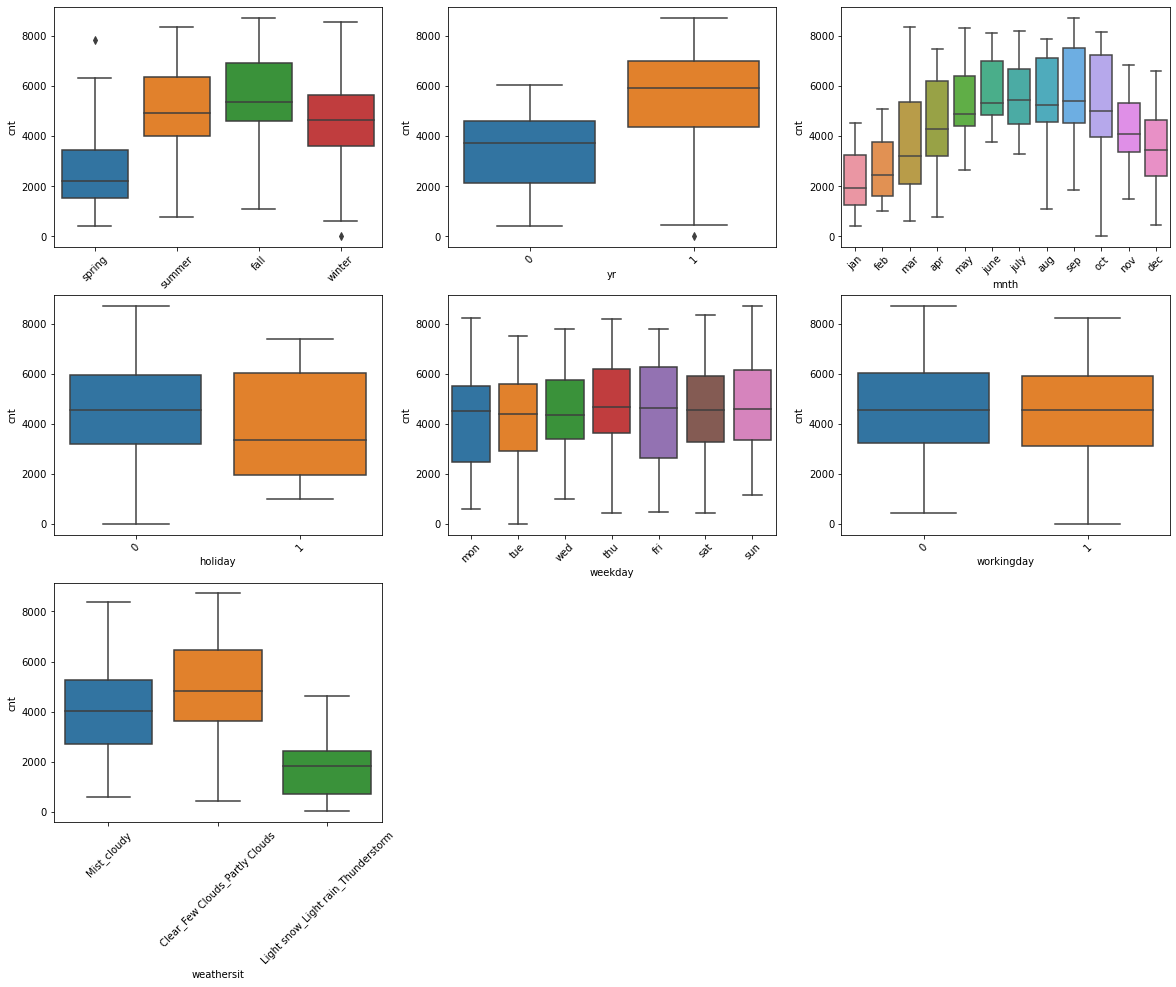

In [214]:
# Looping the category_column to create the box plot and using the For loop make a code efficient and simplier

plt.figure(figsize=(20, 15))
for i,j in enumerate(category_column):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = j, y = 'cnt', data = data)
    plt.xticks(rotation='45')
plt.show()

- Target varaible cnt is high in summer and fall season
- Target variable is more in month june to october
- Cnt is more in 2019 as compared to 2018
- People prefer to rent bike when the sky is clear or few clouds

### Ploting BarPlot Yearwise

In [215]:
def bar_categorical(column):
    plt.figure(figsize = (14,6))
    sns.barplot(column,'cnt',data=data, hue='yr',palette='Set1')
    plt.legend(title='yr', loc='upper left', labels=['2018', '2019'] ,fontsize="x-large" ,labelcolor = ['darkred','blue'])
    plt.show()

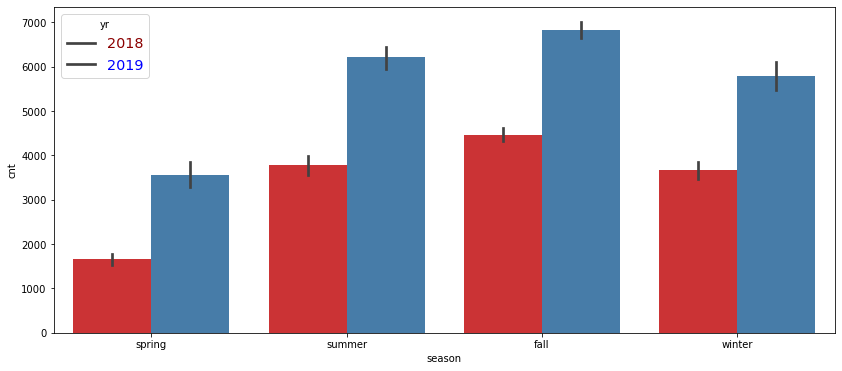

In [216]:
bar_categorical('season')

- Fall season seems to have more renting of bike and the users is increased from 2018 to 2019

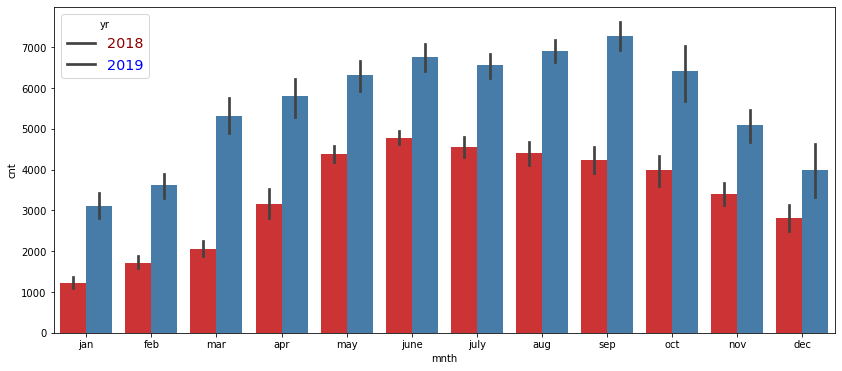

In [217]:
bar_categorical('mnth')

- The users is more in month june, july, aug ,sep and the count is increase from 2018 to 2019

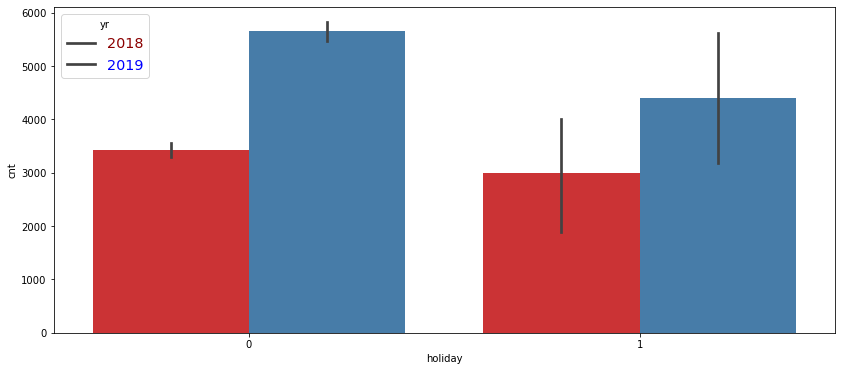

In [218]:
bar_categorical('holiday')

- More people prefer to rent bike on working days and during holiday people prefer to stay home.

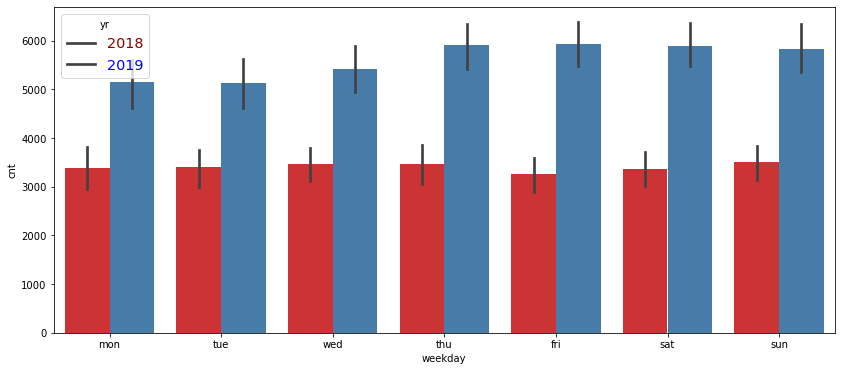

In [219]:
bar_categorical('weekday')

- Thu, Fir, Sat and Sun have more number of users as compared to the start of the week.

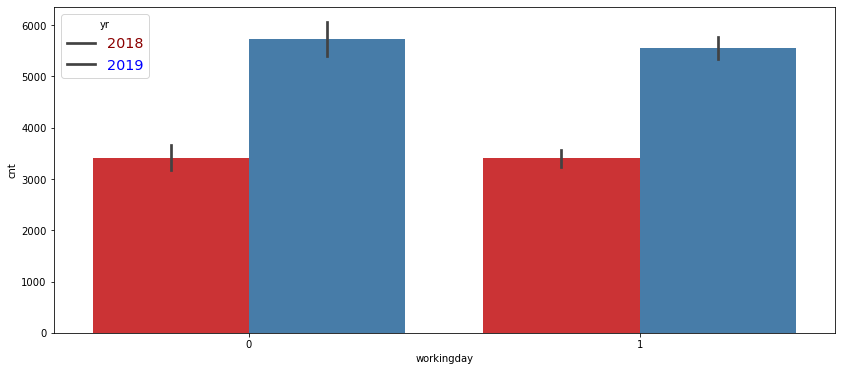

In [220]:
bar_categorical('workingday')

- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

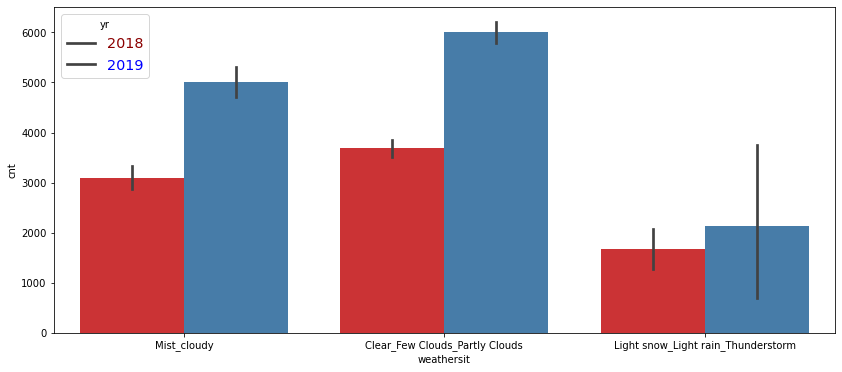

In [221]:
bar_categorical('weathersit')

- People prefer to rent bike when the wheather is clear or few clouds

### Analyzing Numerical Variables

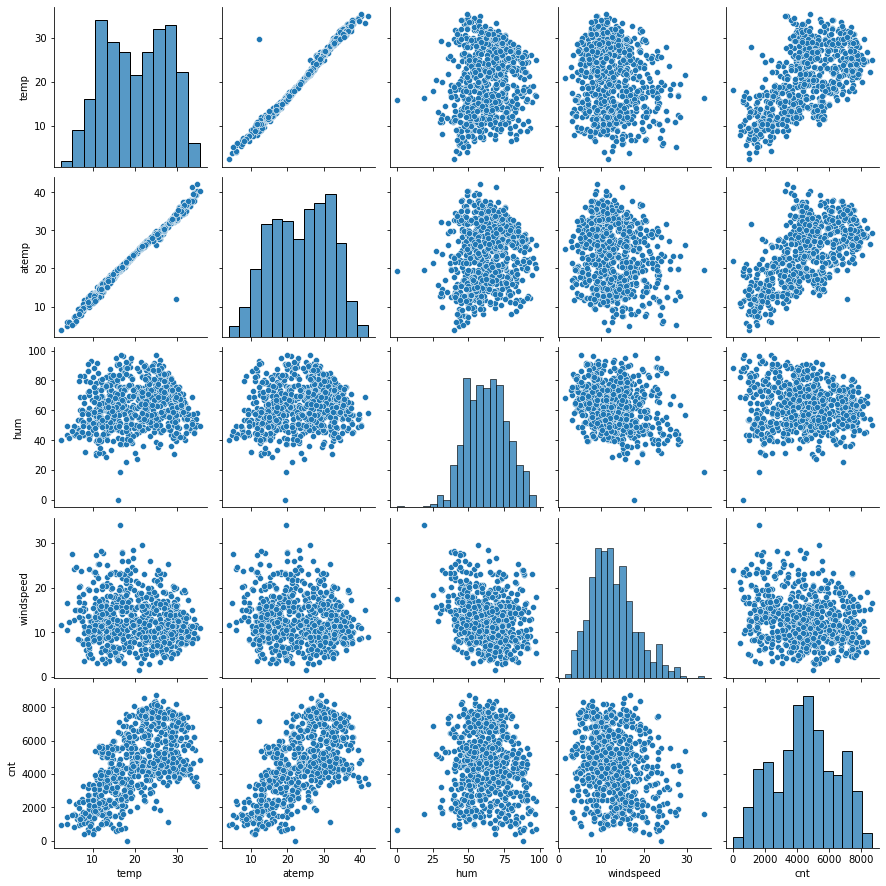

In [222]:
# ploting pair plot for categorical variable
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

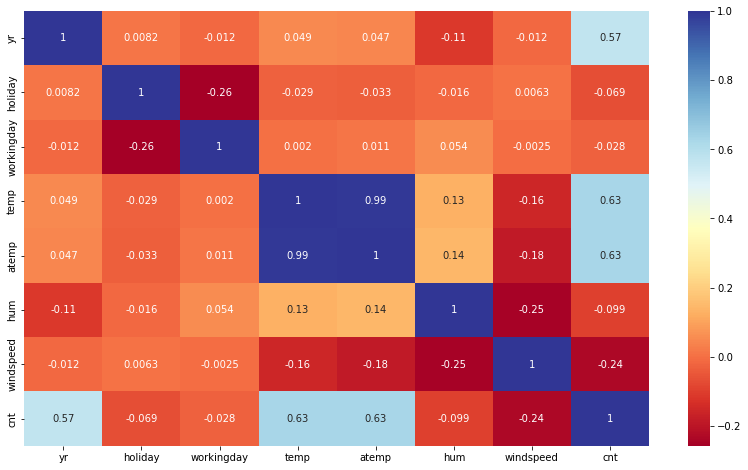

In [223]:
#plotiing thr heat map for checking corelation
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap="RdYlBu")
plt.show()

- The coorelation between temp and atemp is very high 0.99. So we ignore 1 variable during RFE method.
- The coreation between cnt with yr and temp is also pretty good.

## Step 3 : Preparing the Data

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [225]:
## check the data again
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear_Few Clouds_Partly Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear_Few Clouds_Partly Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear_Few Clouds_Partly Clouds,9.305237,11.46350,43.6957,12.522300,1600


#### Create Dummy Variable for season, mnth, weekday,  weathersit

In [226]:
df_seasons = pd.get_dummies(data.season,drop_first=True)
df_months = pd.get_dummies(data.mnth,drop_first=True)
df_weekdays = pd.get_dummies(data.weekday,drop_first=True)
df_weathersit = pd.get_dummies(data.weathersit,drop_first=True)

In [227]:
df_seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [228]:
df_months

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [229]:
df_weekdays

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [230]:
df_weathersit

,Light snow_Light rain_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [231]:
# concating all the dataframe to the original data
data = pd.concat([data,df_seasons,df_months,df_weekdays,df_weathersit],axis=1)

In [232]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
0,spring,0,jan,0,mon,1,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear_Few Clouds_Partly Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear_Few Clouds_Partly Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear_Few Clouds_Partly Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# Dropping season, mnth, weekday, weathersit columns as we have already created dummy variable out of it.
data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [234]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   atemp                               730 non-null    float64
 5   hum                                 730 non-null    float64
 6   windspeed                           730 non-null    float64
 7   cnt                                 730 non-null    int64  
 8   spring                              730 non-null    uint8  
 9   summer                              730 non-null    uint8  
 10  winter                              730 non-null    uint8  
 11  aug                                 730 non-n

## Step 4 : Split the dataset into Training and Test data

In [236]:
# splitting the dataframe into test and train

# we need same row for test and train data respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [237]:
# checking the train data
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [238]:
data_train.shape

(510, 30)

In [239]:
# checking the test data
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [240]:
data_test.shape

(219, 30)

#### Scaling the Numerical Variable

In [241]:
# Using the minmaxscaler for sclaing the numerical variable..
scaler = MinMaxScaler()

In [242]:
# checking the columns again
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light snow_Light rain_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

In [243]:
numerical_var = ['temp', 'atemp', 'hum', 'windspeed' ,'cnt']
data_train[numerical_var] = scaler.fit_transform(data_train[numerical_var])

In [244]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [245]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
## creating the X anf y variable
y_train = data_train.pop('cnt')
X_train = data_train

In [247]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [248]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Analyzing the Corelation matrix among the variables

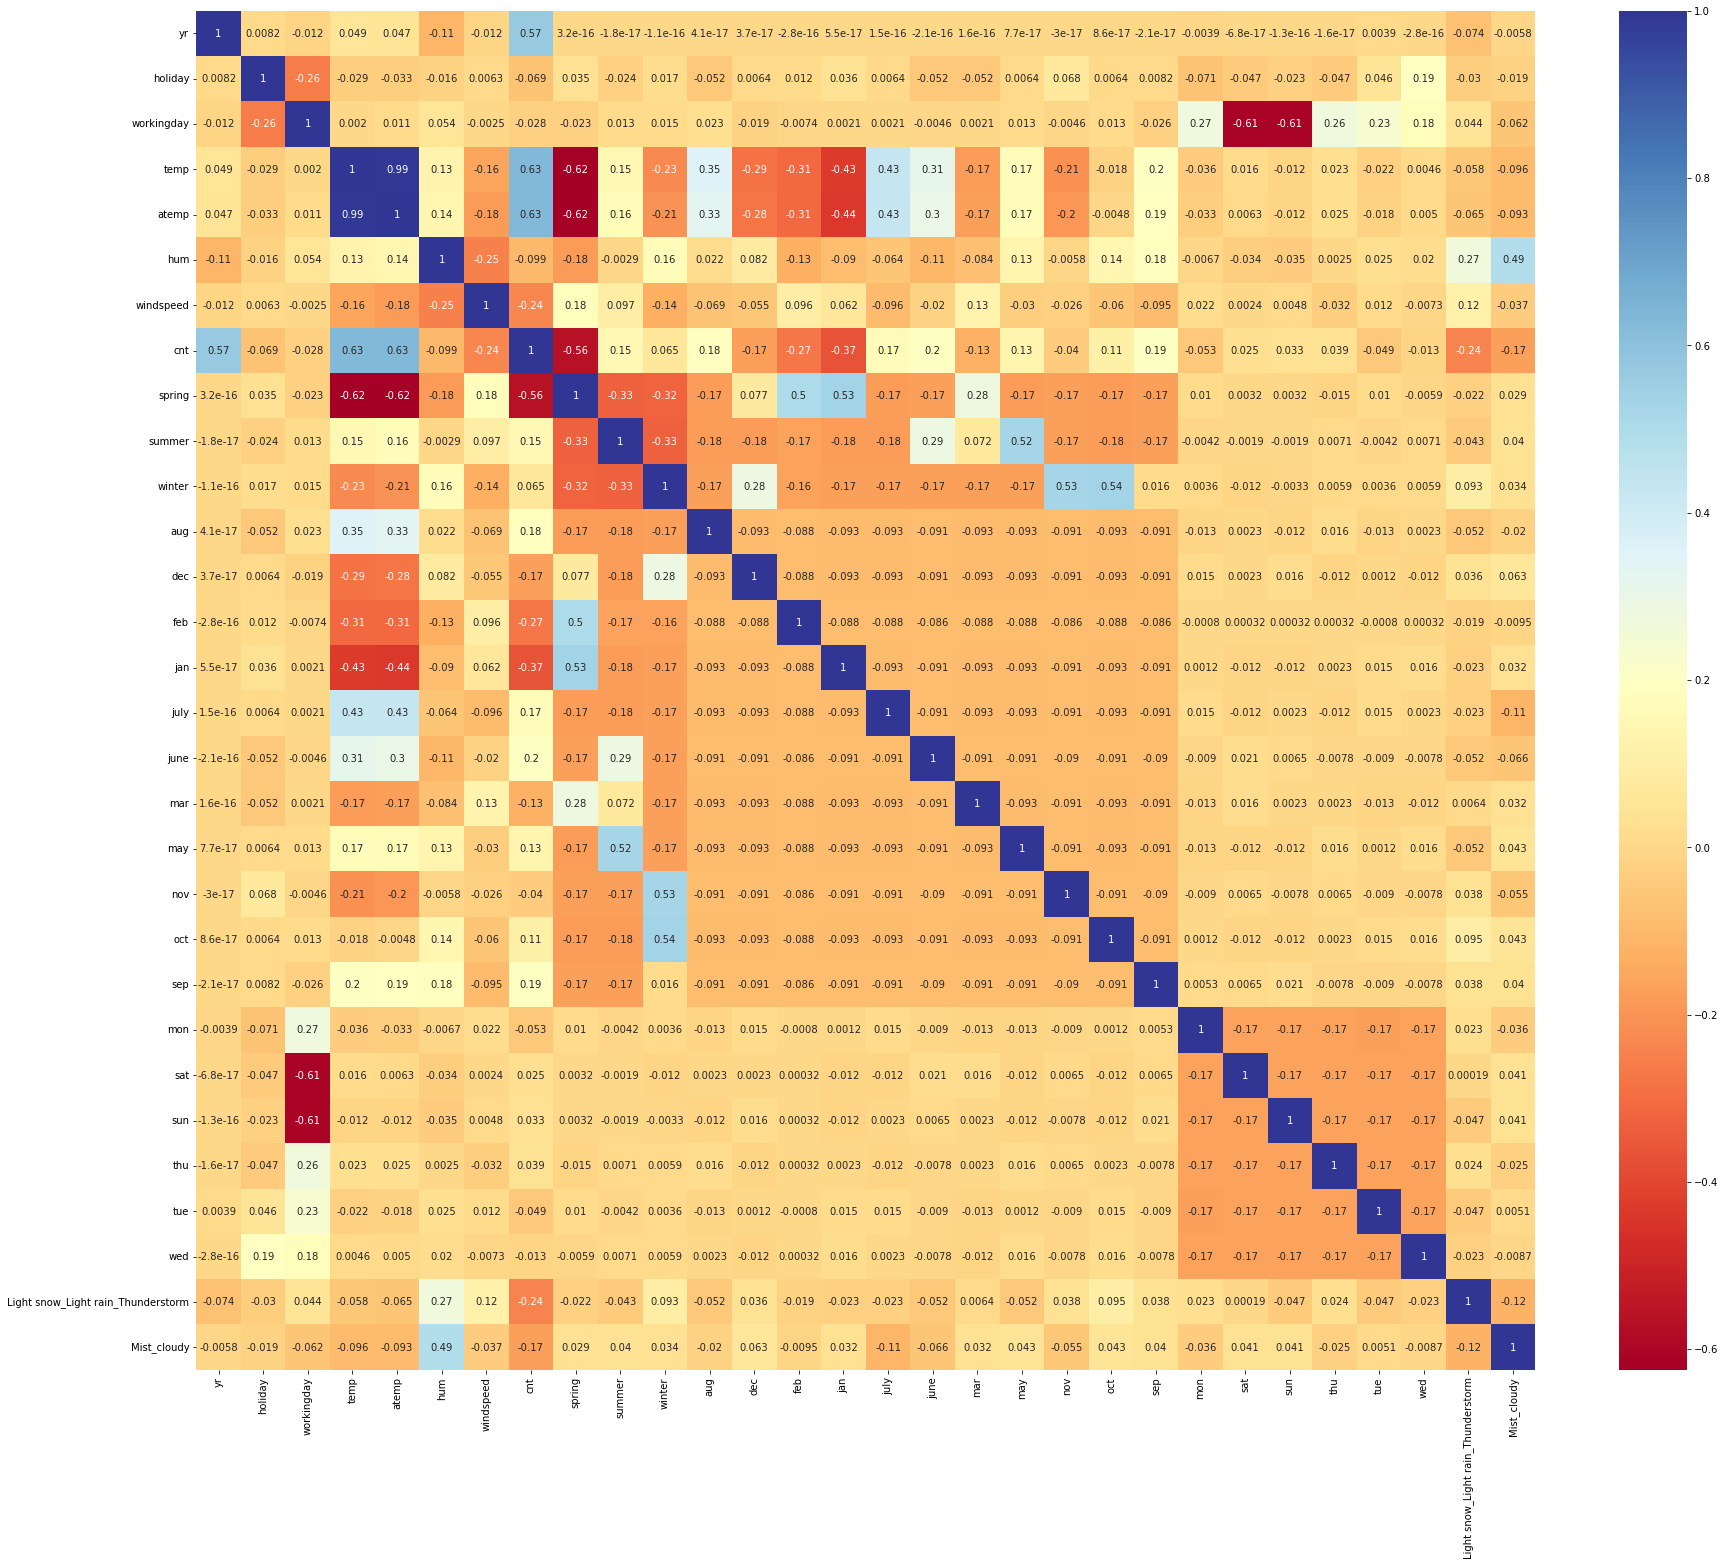

In [249]:
plt.figure(figsize=(30,25))
sns.heatmap(data.corr() , annot = True, cmap='RdYlBu')
plt.show()

- CNT target variable shows good corelation with temp, atemp , yr. While there is a good negative corelation with spring also.
- CNT also show good coreation with jan, feb and light snow_light rain_thunderstorm variable.

## Selecting the Top15 variable through RFE method

In [250]:
# RFE method for feature Elimination

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [251]:
# zipping the columns name with ranking 
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light snow_Light rain_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [252]:
# selecting the RFE columns
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep',
       'Light snow_Light rain_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

# Step 5 Building the Linear Model

##### Building the First Model

In [253]:
X_train_RFE = X_train[column]

In [254]:
X_train_lm_1 = sm.add_constant(X_train_RFE)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        08:30:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Calculate VIF

In [255]:
## Creating the generic function to calculate VIF
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values ,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [256]:
calculate_VIF(X_train_RFE)

,feature,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist_cloudy,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


In [257]:
# As humidity shows very high VIF values hence we can drop it
X_train_new = X_train_RFE.drop(['hum'], axis = 1)

##### Building the second model

In [258]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        08:30:48   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [259]:
# calculating the VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,july,1.59
13,Mist_cloudy,1.56


In [260]:
# As summer shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['summer'], axis = 1)

##### Building the third Model

In [261]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.08e-186
Time:                        08:30:48   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [262]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,Mist_cloudy,1.53
6,dec,1.46
8,july,1.36


The model seems good as all the VIF value should be less than 5. Let's make the model better

In [263]:
# As nov shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['nov'], axis = 1)

##### Buiding the fourth model

In [264]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.02e-186
Time:                        08:30:49   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [265]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,jan,1.64
11,Mist_cloudy,1.53
8,july,1.36
6,dec,1.29
9,sep,1.20


In [266]:
# As dec shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['dec'], axis = 1)

##### building the fifth model

In [267]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.13e-186
Time:                        08:30:49   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [268]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,jan,1.60
10,Mist_cloudy,1.53
5,winter,1.40
7,july,1.36
8,sep,1.20
9,Light snow_Light rain_Thunderstorm,1.08


In [269]:
# As Jan shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

##### Building the sixth model

In [270]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.16e-186
Time:                        08:30:49   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [271]:
# calculate VIF
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist_cloudy,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,Light snow_Light rain_Thunderstorm,1.08
1,holiday,1.04


- We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors is significant.
- F-Statistics value of 248.7 (which is greater than 1) and the Prob (F-statistic) of 1.16e-186 i.e almost equals to zero, states that the overall model is significant

In [272]:
#checking the coefficient parameter
lr_6.params

const                                 0.251899
yr                                    0.234092
holiday                              -0.098556
temp                                  0.451455
windspeed                            -0.139817
spring                               -0.110795
winter                                0.047278
july                                 -0.072719
sep                                   0.057705
Light snow_Light rain_Thunderstorm   -0.286408
Mist_cloudy                          -0.081133
dtype: float64

## Step 6 : Residual Analaysis

In [273]:
# calculating the prediction value of y for the lr_6 model
y_train_pred = lr_6.predict(X_train_lm_6)

#### Distribution Of Error Terms

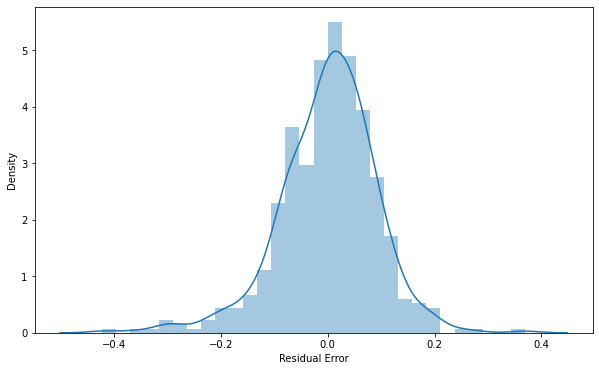

In [274]:
# plotting the histogram graph of the residual
plt.figure(figsize=(10,6))
sns.distplot(y_train - y_train_pred ,bins =30)
plt.xlabel("Residual Error")
plt.show()

- As per the above graph,errors are normally distributed 

## Homoscedasticity Of Model

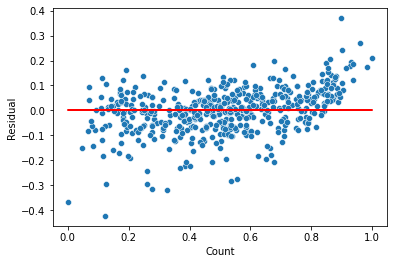

In [275]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- Model is distributed over the line. And there is no visible pattern is there.

## Multicolinearity Of Model

In [276]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist_cloudy,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,Light snow_Light rain_Thunderstorm,1.08
1,holiday,1.04


All the values is less than 5. So the model is having no multi colinearity

## Linearity Of Model

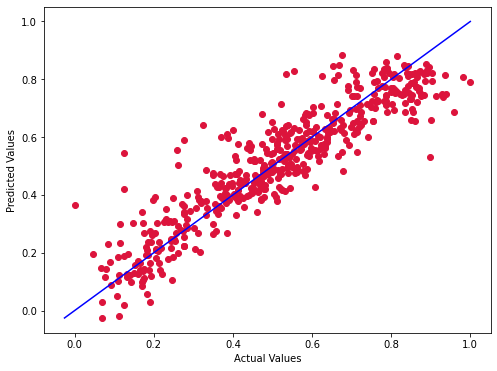

In [277]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')

- The actual value and predicted value are showing linearly corelation.

# Step 7 : Making Final Prediction

In [278]:
# Applying scaling on the test dataset as we did earlier
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

data_test[numerical_vars] = scaler.transform(data_test[numerical_vars])

In [279]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [280]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [281]:
# prepare the X and  y data for test
y_test = data_test.pop('cnt')
X_test = data_test

In [282]:
columns_test = X_train_new.columns
X_test = X_test[columns_test]

In [283]:
X_test.head()

,yr,holiday,temp,windspeed,spring,winter,july,sep,Light snow_Light rain_Thunderstorm,Mist_cloudy
184,0,1,0.831783,0.084219,0,0,1,0,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [284]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [285]:
X_test_lm_6 = sm.add_constant(X_test)
y_test_pred = lr_6.predict(X_test_lm_6)  # predicing the values using the model

In [286]:
# checking the r2 score
r2 = r2_score(y_test, y_test_pred) 

In [287]:
r2

0.8070101019557965

## Step 8 : Model Evaluation

Text(0, 0.5, 'y_pred')

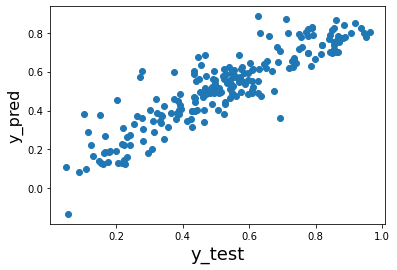

In [288]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [289]:
lr_6.params

const                                 0.251899
yr                                    0.234092
holiday                              -0.098556
temp                                  0.451455
windspeed                            -0.139817
spring                               -0.110795
winter                                0.047278
july                                 -0.072719
sep                                   0.057705
Light snow_Light rain_Thunderstorm   -0.286408
Mist_cloudy                          -0.081133
dtype: float64

Write the Equation

#### cnt = 0.251899 + 0.234092 x yr + -0.098556 x holiday + 0.451455 x temp + -0.139817 x windspeed + -0.110795 x spring + 0.047278 x winter + -0.072719 x july + 0.057705 x sep + -0.286408 x Light snow_Light rain_Thunderstorm + -0.081133 x Mist_cloudy

In [290]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7977


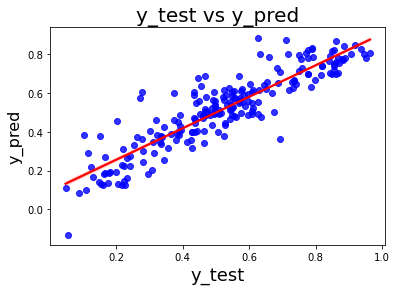

In [291]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

The model is giving the accurate prediction as the graph between test data and predicted data is linear.

# Final Summary

#### Comparison

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8070
- Train dataset Adjusted R^2 : 0.830   
- Test dataset Adjusted R^2  : 0.7977

### Demand of bike depend on the below factors :                                
- yr, holiday, temp, windspeed, spring, winter, july, sep,Light snow_Light rain_Thunderstorm,Mist_cloudy